# Monte Carlo Simulation of Stock Prices using Geometric Brownian Motion (GBM)


## 1. Problem Statement
The purpose of this project is to simulate stock price trajectories using the Geometric Brownian Motion (GBM) model.  
GBM is one of the most widely used models in quantitative finance for:
- Modeling stock price evolution over time.
- Pricing options and derivatives.
- Risk assessment and portfolio simulations.

The simulation will:
- Generate multiple stock price paths.
- Visualize the distribution of prices.
- Explore the impact of volatility (σ) and drift (μ) on price behavior.


## 2. Mathematical Background
A common model for stock prices is **Geometric Brownian Motion (GBM)**, defined as the stochastic differential equation (SDE):

$
dS_t = \mu S_t \, dt + \sigma S_t \, dW_t
$

Where:
- $ S_t $ = Stock price at time $t $ 
- $ \mu $ = Drift (expected return)  
- $ \sigma $ = Volatility of returns  
- $ W_t $ = Standard Brownian motion (Wiener process)  

---

**Solution of the SDE**:

The analytical solution to the GBM equation is:

$
S_t = S_0 \, \exp\left( (\mu - \frac12 \sigma^2)t + \sigma W_t \right)
$

Where:
- $ S_0 $ = Initial stock price  
- $ \exp(\cdot) $ = Exponential growth term affected by drift and random fluctuations  
- $ W_t \sim N(0, t) $ is normally distributed  

---

**Model assumptions**:
- Log returns are normally distributed.
- Stock price changes are proportional to current price.

## 3. Method

1. **Define model parameters**  
   - Initial price $ S_0 $  
   - Drift $ \mu $ (expected return)  
   - Volatility $ \sigma $  
   - Time horizon $ T $ (years)  
   - Number of time steps  
   - Number of simulation paths  

2. **Simulate Brownian motion**  
   - Time step: $ \Delta t = \frac{T}{N_{\text{steps}}} $
   - Random increments: $ \Delta W \sim \mathcal{N}(0, \Delta t) $
   - Cumulative Brownian motion:  
  $
   W_t = \sum_{i=1}^{n} \Delta W_i
   $

3. **Apply GBM formula**  
   For each path:
  $
   S_t = S_0 \, \exp\left( (\mu - \frac12 \sigma^2)t + \sigma W_t \right)
 $

4. **Visualize results**  
   - Plot multiple simulated price paths.  
   - Plot histogram of terminal prices.

5. **Interpret results**  
   - Observe the effect of drift $ \mu $ and volatility $ \sigma $.  
   - Relate price distribution to lognormal properties.


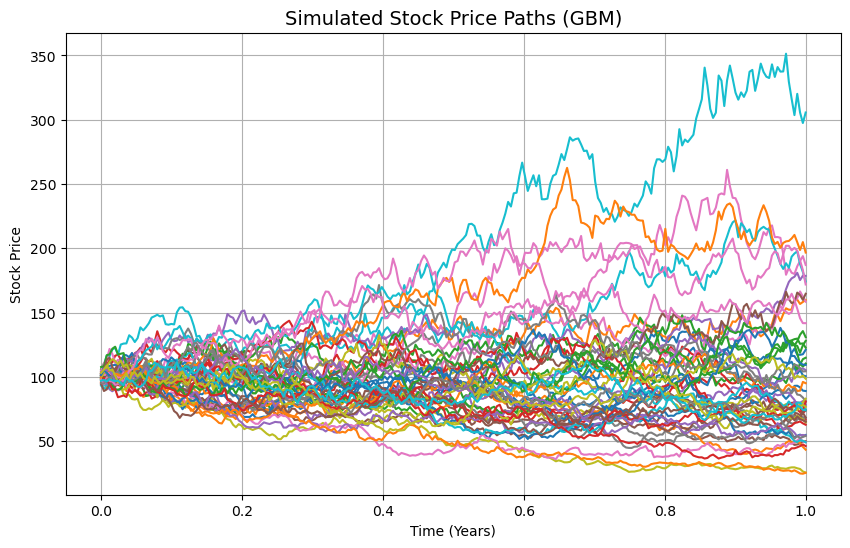

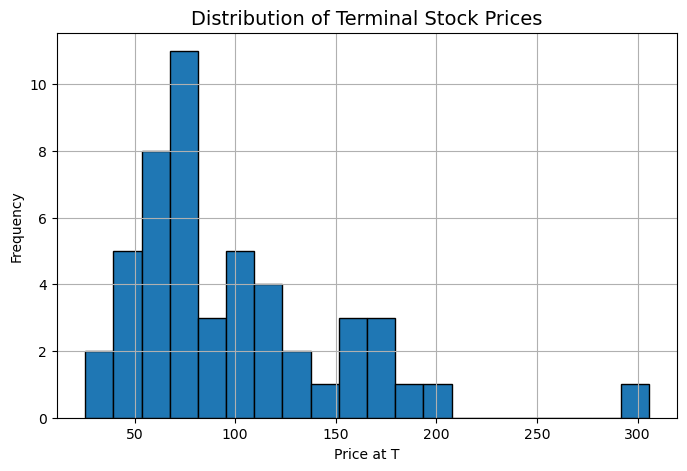

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# ----- 1. Parameters -----
S0 = 100       # Initial stock price
mu = 0.02      # Drift (annual return)
sigma = 0.5    # Volatility
T = 1.0        # Time horizon (years)
N_steps = 252  # Trading days in a year
N_paths = 50   # Number of simulated paths

dt = T / N_steps  # Time step

# ----- 2. Simulate Brownian Motion -----
# Random normal increments for Brownian motion
dW = np.random.normal(0, np.sqrt(dt), (N_steps, N_paths))
W = np.cumsum(dW, axis=0)  # Cumulative Brownian motion

# ----- 3. Apply GBM formula -----
time_grid = np.linspace(0, T, N_steps)
S = S0 * np.exp((mu - 0.5 * sigma**2) * time_grid[:, None] + sigma * W)

# ----- 4. Plot simulated paths -----
plt.figure(figsize=(10, 6))
plt.plot(time_grid, S)
plt.title('Simulated Stock Price Paths (GBM)', fontsize=14)
plt.xlabel('Time (Years)')
plt.ylabel('Stock Price')
plt.grid(True)
plt.show()

# ----- 5. Plot histogram of terminal prices -----
plt.figure(figsize=(8, 5))
plt.hist(S[-1, :], bins=20, edgecolor='black')
plt.title('Distribution of Terminal Stock Prices', fontsize=14)
plt.xlabel('Price at T')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()
